# Challenge Project: Multi-Feature Neural Network Regression

# Goal:
# Predict house prices based on multiple features using an Artificial Neural Network (ANN).



In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Create the dataset
np.random.seed(42)  # For reproducibility
house_size = np.random.randint(500, 3500, 10000)  # House sizes between 500 and 3500 sq ft
num_rooms = np.random.randint(1, 6, 10000)        # Number of rooms (1 to 5)
age = np.random.randint(1, 50, 10000)             # Age of the house (1 to 50 years)
house_price = (
    house_size * 0.3 +
    num_rooms * 10 +
    age * -2 +
    np.random.normal(0, 100, 10000)                # House price with some noise
)

# Convert to a DataFrame
data = pd.DataFrame({
    "House Size (sq ft)": house_size,
    "Number of Rooms": num_rooms,
    "Age of House (years)": age,
    "Price ($1000s)": house_price
})



# Step 2: Explore the data

In [3]:

print("Dataset preview:")
print(data.head())



Dataset preview:
   House Size (sq ft)  Number of Rooms  Age of House (years)  Price ($1000s)
0                1360                1                    20      299.770743
1                1794                3                    15      680.408670
2                1630                2                    33      407.884121
3                1595                4                    17      440.775921
4                2138                5                    20      586.047875


# Step 3: Split the data into training and testing sets

In [4]:

X = data[["House Size (sq ft)", "Number of Rooms", "Age of House (years)"]]  # Features
y = data["Price ($1000s)"]                                                   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Scale the features


In [5]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
y=y.values.reshape(-1, 1)
scaler_X.fit(X)
scaler_y.fit(y)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Step 5: Build the ANN model

In [8]:

model = Sequential([
    Dense(16, input_dim=3, activation='relu'),  # Input layer with 3 features and 8 neurons
    Dense(8, activation='relu'),               # Hidden layer with 4 neurons
    Dense(1, activation='relu')               # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




# Step 6: Train the model

In [9]:

history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=10, validation_split=0.2, verbose=1)



Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0684 - mae: 0.1783 - val_loss: 0.0053 - val_mae: 0.0578
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - mae: 0.0569 - val_loss: 0.0049 - val_mae: 0.0558
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052 - mae: 0.0574 - val_loss: 0.0048 - val_mae: 0.0555
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0049 - mae: 0.0561 - val_loss: 0.0048 - val_mae: 0.0555
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0049 - mae: 0.0562 - val_loss: 0.0048 - val_mae: 0.0556
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049 - mae: 0.0555 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - mae: 0.0568 - val_loss: 0.0051 - val_mae: 0.0575
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - mae: 0.0554 - val_loss: 0.0049 - val_mae: 0.0556
Epoch 9/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

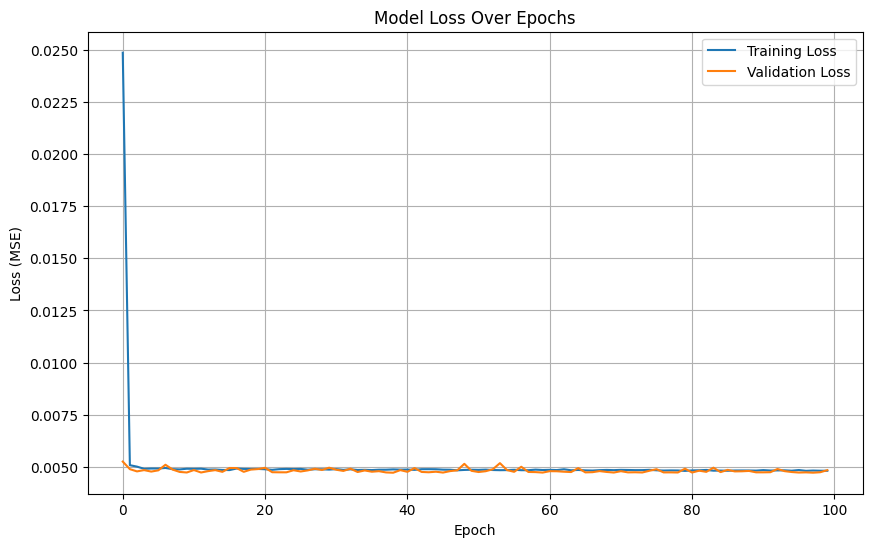

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Evaluate the model

In [11]:

y_pred = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared score
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

Model Evaluation:
Mean Squared Error: 10389.57
R-squared Score: 0.87


# Step 8: Visualize actual vs predicted prices

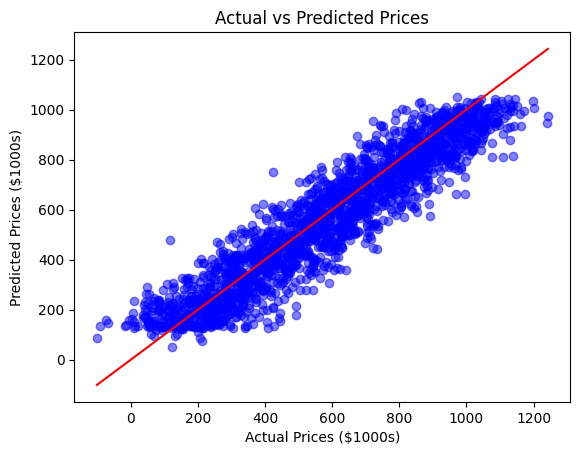

In [12]:

plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")  # Perfect prediction line
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.show()



# Additional step: Make a prediction for a new house

In [13]:

new_house = np.array([[2000, 4, 20]])  # Predict price for a 2000 sq ft house with 4 rooms and 20 years old
new_house_scaled = scaler_X.transform(new_house)
predicted_price = model.predict(new_house_scaled)
predicted_price = scaler_y.inverse_transform(predicted_price)
print(f"Predicted price for a 2000 sq ft house with 4 rooms and 20 years old: ${predicted_price[0][0] * 1000:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted price for a 2000 sq ft house with 4 rooms and 20 years old: $580276.75


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
